In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot

import os

In [3]:
validate = pd.read_csv("./validate.csv")

validate["actual_med"] = validate["actual_med"].apply(lambda x: 1e7 if x == 0.0 else x)

start_time = validate["t"].min()

validate["t"] = validate["t"] - start_time

validate["expected"] = (validate["expected_before"] + validate["expected_after"])
validate["expected"] = validate["expected"].apply((lambda x: 1e7 if x == 2e7 else x))

validate

,t,shell,sat,expected_before,expected_after,actual_med,actual_avg,actual_max,actual_min,loss,expected
0,0.000000,0,9,1.268124e+01,1.268124e+01,2.890038e+01,2.890038e+01,2.890038e+01,2.890038e+01,2.890038e+01,2.536247e+01
1,0.048894,0,31,8.872699e+00,8.872699e+00,2.228713e+01,2.228713e+01,2.228713e+01,2.228713e+01,2.228713e+01,1.774540e+01
2,0.089714,0,53,5.051324e+00,5.051324e+00,1.465559e+01,1.465559e+01,1.465559e+01,1.465559e+01,1.465559e+01,1.010265e+01
3,0.130343,0,75,4.639382e+00,4.639382e+00,1.191068e+01,1.191068e+01,1.191068e+01,1.191068e+01,1.191068e+01,9.278764e+00
4,0.602711,0,834,2.205973e+02,2.205973e+02,4.440739e+02,4.440739e+02,4.440739e+02,4.440739e+02,4.440739e+02,4.411947e+02
...,...,...,...,...,...,...,...,...,...,...,...
1677,1898.354779,3,30,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
1678,1902.387223,4,0,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
1679,1902.413703,4,30,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
1680,1906.445702,5,0,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07


In [4]:
validate["diff"] = validate["expected"] - validate["actual_med"]
validate["host"] = validate["sat"] % 3
validate

,t,shell,sat,expected_before,expected_after,actual_med,actual_avg,actual_max,actual_min,loss,expected,diff,host
0,0.000000,0,9,1.268124e+01,1.268124e+01,2.890038e+01,2.890038e+01,2.890038e+01,2.890038e+01,2.890038e+01,2.536247e+01,-3.537911,0
1,0.048894,0,31,8.872699e+00,8.872699e+00,2.228713e+01,2.228713e+01,2.228713e+01,2.228713e+01,2.228713e+01,1.774540e+01,-4.541732,1
2,0.089714,0,53,5.051324e+00,5.051324e+00,1.465559e+01,1.465559e+01,1.465559e+01,1.465559e+01,1.465559e+01,1.010265e+01,-4.552941,2
3,0.130343,0,75,4.639382e+00,4.639382e+00,1.191068e+01,1.191068e+01,1.191068e+01,1.191068e+01,1.191068e+01,9.278764e+00,-2.631913,0
4,0.602711,0,834,2.205973e+02,2.205973e+02,4.440739e+02,4.440739e+02,4.440739e+02,4.440739e+02,4.440739e+02,4.411947e+02,-2.879229,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1898.354779,3,30,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,0.000000,0
1678,1902.387223,4,0,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,0.000000,0
1679,1902.413703,4,30,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,0.000000,0
1680,1906.445702,5,0,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,0.000000,0


In [5]:
validate["OK"] = validate["diff"].apply((lambda x: "OK" if abs(x) < 3 else "MEH" if abs(x) < 100 else "NOT OK"))
validate

,t,shell,sat,expected_before,expected_after,actual_med,actual_avg,actual_max,actual_min,loss,expected,diff,host,OK
0,0.000000,0,9,1.268124e+01,1.268124e+01,2.890038e+01,2.890038e+01,2.890038e+01,2.890038e+01,2.890038e+01,2.536247e+01,-3.537911,0,MEH
1,0.048894,0,31,8.872699e+00,8.872699e+00,2.228713e+01,2.228713e+01,2.228713e+01,2.228713e+01,2.228713e+01,1.774540e+01,-4.541732,1,MEH
2,0.089714,0,53,5.051324e+00,5.051324e+00,1.465559e+01,1.465559e+01,1.465559e+01,1.465559e+01,1.465559e+01,1.010265e+01,-4.552941,2,MEH
3,0.130343,0,75,4.639382e+00,4.639382e+00,1.191068e+01,1.191068e+01,1.191068e+01,1.191068e+01,1.191068e+01,9.278764e+00,-2.631913,0,OK
4,0.602711,0,834,2.205973e+02,2.205973e+02,4.440739e+02,4.440739e+02,4.440739e+02,4.440739e+02,4.440739e+02,4.411947e+02,-2.879229,0,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1898.354779,3,30,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,0.000000,0,OK
1678,1902.387223,4,0,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,0.000000,0,OK
1679,1902.413703,4,30,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,0.000000,0,OK
1680,1906.445702,5,0,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,0.000000,0,OK


<AxesSubplot:xlabel='t', ylabel='diff'>

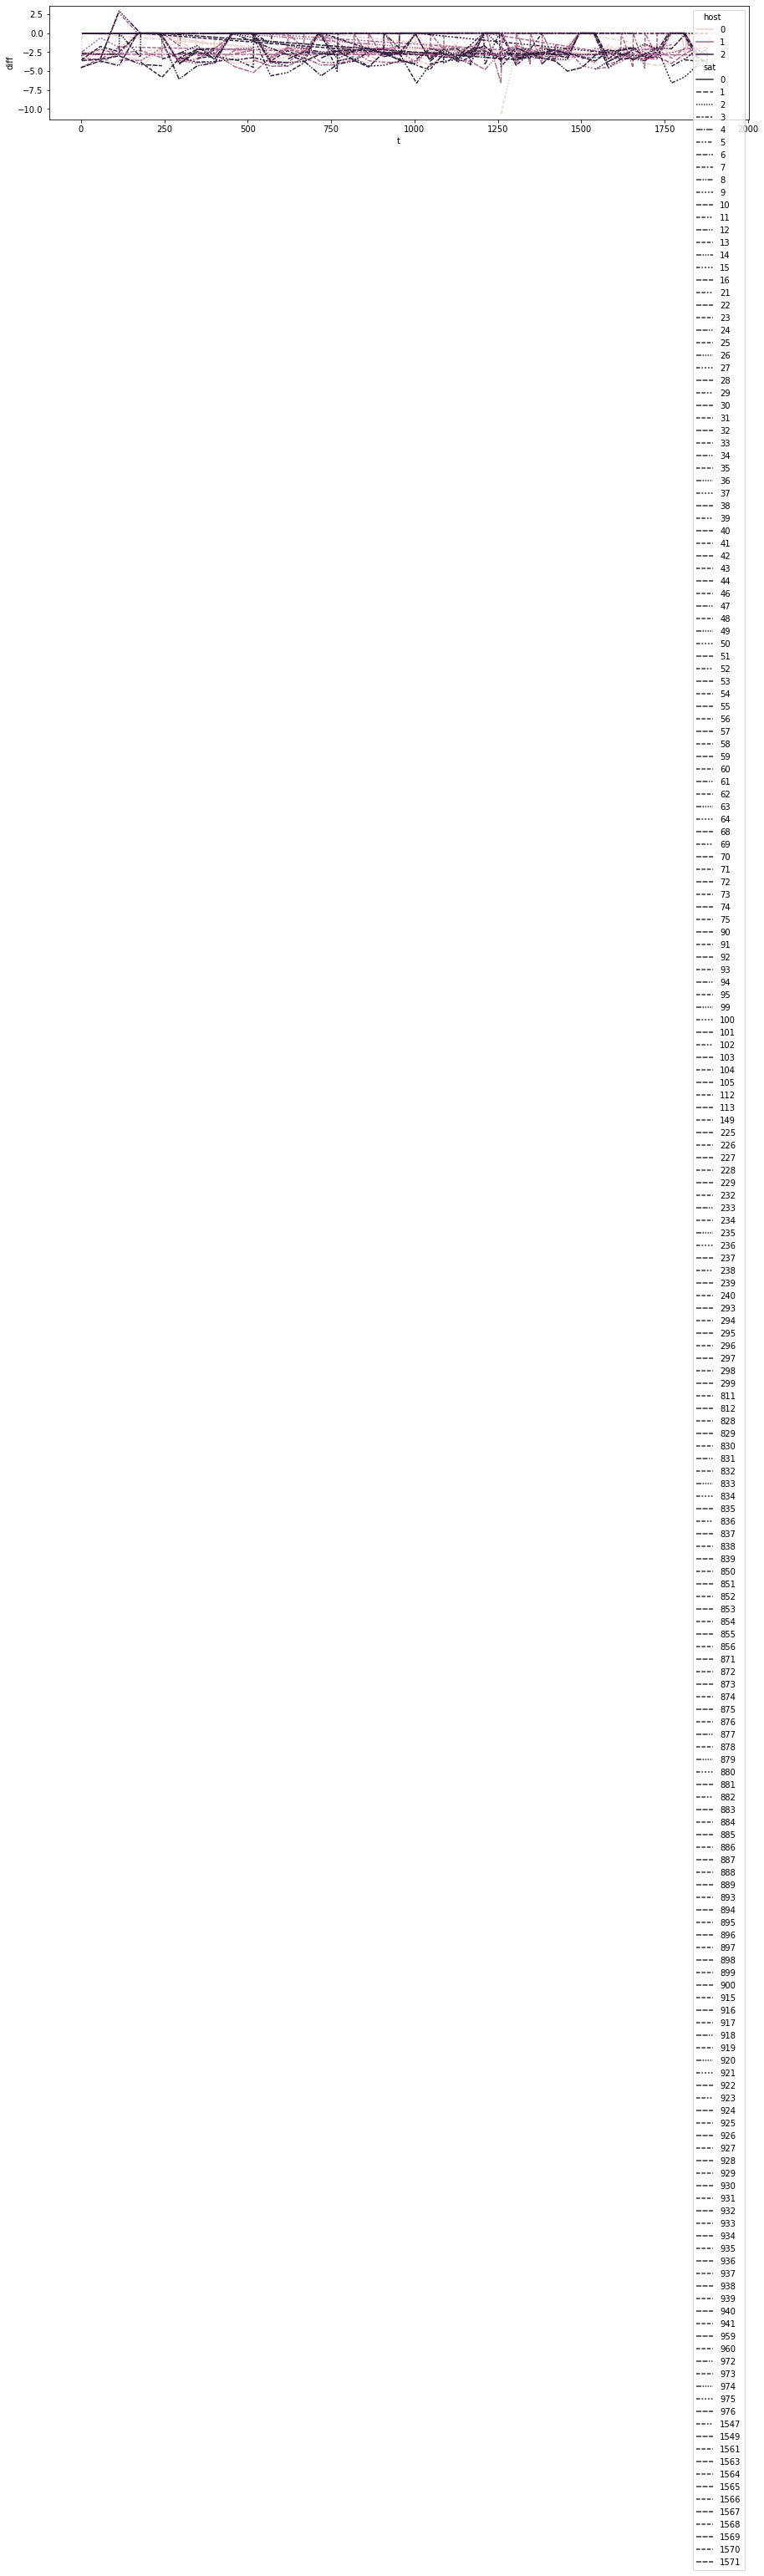

In [6]:
fig, ax = pyplot.subplots(figsize=[15,2.5])
sns.lineplot(data=validate[validate["OK"] != "NOT OK"], x="t", y="diff", hue="host", style="sat", ax=ax)

In [7]:
validate_clean = validate[(validate["expected"].abs() < 100) & (validate["actual_med"].abs() < 100)]

<AxesSubplot:xlabel='t', ylabel='diff'>

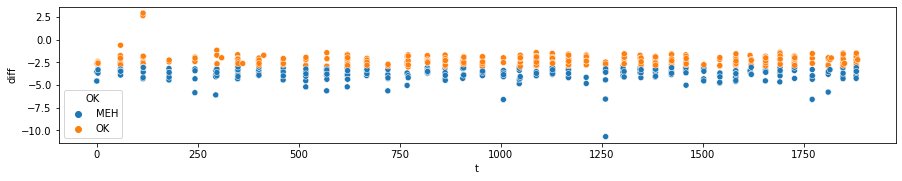

In [8]:
fig, ax = pyplot.subplots(figsize=[15,2.5])
sns.scatterplot(data=validate_clean, x="t", y="diff", hue="OK", ax=ax)

<AxesSubplot:xlabel='t', ylabel='expected'>

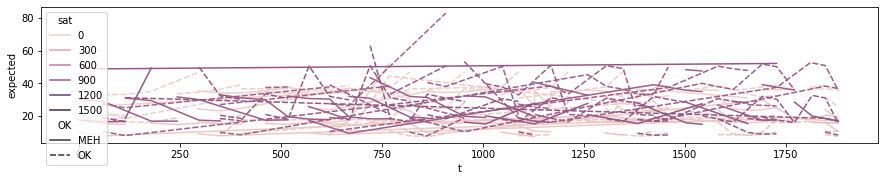

In [9]:
fig, ax = pyplot.subplots(figsize=[15,2.5])
sns.lineplot(data=validate_clean, x="t", y="expected", hue="sat", style="OK", ax=ax)

<AxesSubplot:xlabel='t', ylabel='actual_med'>

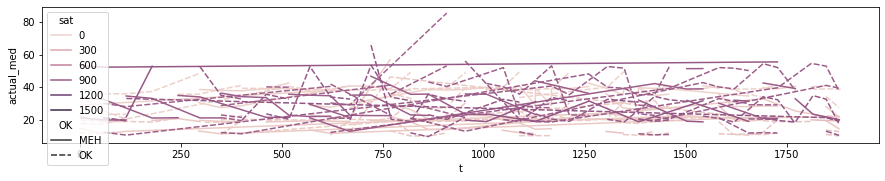

In [10]:
fig, ax = pyplot.subplots(figsize=[15,2.5])
sns.lineplot(data=validate_clean, x="t", y="actual_med", hue="sat", style="OK", ax=ax)

<AxesSubplot:xlabel='t', ylabel='diff'>

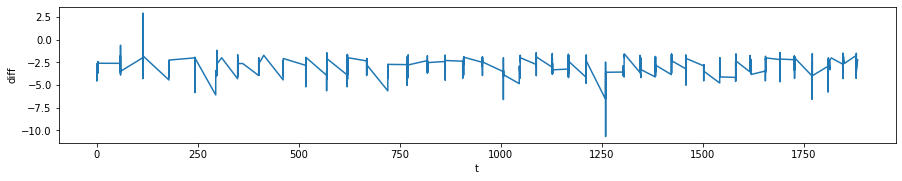

In [11]:
fig, ax = pyplot.subplots(figsize=[15,2.5])
sns.lineplot(data=validate_clean, x="t", y="diff", ax=ax)

In [12]:
cndnsd = validate_clean.copy()
cndnsd["t"] =  np.floor(cndnsd["t"]/1e9) * 1e9
cndnsd

,t,shell,sat,expected_before,expected_after,actual_med,actual_avg,actual_max,actual_min,loss,expected,diff,host,OK
0,0.0,0,9,12.681237,12.681237,28.900385,28.900385,28.900385,28.900385,28.900385,25.362474,-3.537911,0,MEH
1,0.0,0,31,8.872699,8.872699,22.287130,22.287130,22.287130,22.287130,22.287130,17.745398,-4.541732,1,MEH
2,0.0,0,53,5.051324,5.051324,14.655590,14.655590,14.655590,14.655590,14.655590,10.102649,-4.552941,2,MEH
3,0.0,0,75,4.639382,4.639382,11.910677,11.910677,11.910677,11.910677,11.910677,9.278764,-2.631913,0,OK
9,0.0,1,13,18.180713,18.180713,39.116859,39.116859,39.116859,39.116859,39.116859,36.361426,-2.755434,1,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,0.0,1,922,14.726285,14.726285,32.315969,32.315969,32.315969,32.315969,32.315969,29.452570,-2.863400,1,OK
1665,0.0,1,923,8.442649,8.442649,19.972801,19.972801,19.972801,19.972801,19.972801,16.885297,-3.087504,2,MEH
1666,0.0,1,924,7.713012,7.713012,16.906261,16.906261,16.906261,16.906261,16.906261,15.426024,-1.480237,0,OK
1667,0.0,1,972,24.515610,24.515610,52.513838,52.513838,52.513838,52.513838,52.513838,49.031220,-3.482618,0,MEH


<AxesSubplot:xlabel='t', ylabel='diff'>

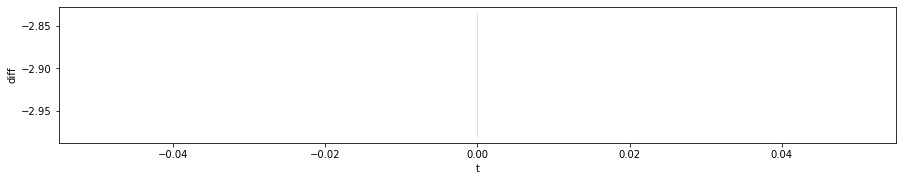

In [13]:
fig, ax = pyplot.subplots(figsize=[15,2.5])
sns.lineplot(data=cndnsd, x="t", y="diff", ax=ax)

In [14]:
validate[validate["diff"] > 0]

,t,shell,sat,expected_before,expected_after,actual_med,actual_avg,actual_max,actual_min,loss,expected,diff,host,OK
90,114.293842,0,31,8.045605,8.045605e+00,13.423204,13.423204,13.423204,13.423204,13.423204,1.609121e+01,2.668005e+00,1,OK
96,114.579436,0,1571,15.707036,1.570704e+01,28.473377,28.473377,28.473377,28.473377,28.473377,3.141407e+01,2.940694e+00,2,OK
1417,1619.303873,0,938,232.258665,1.000000e+07,466.459990,466.459990,466.459990,466.459990,466.459990,1.000023e+07,9.999766e+06,2,NOT OK


In [15]:
wrong_block = validate[(validate["expected"] < 1e7) & (validate["actual_med"] == 1e7)]
wrong_block

,t,shell,sat,expected_before,expected_after,actual_med,actual_avg,actual_max,actual_min,loss,expected,diff,host,OK


<AxesSubplot:>

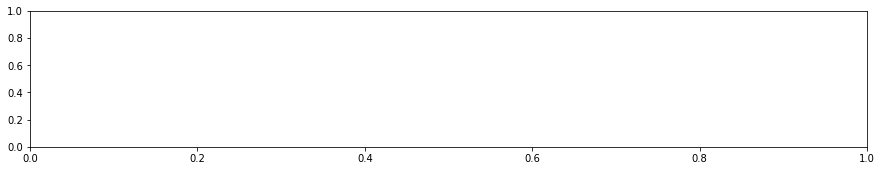

In [16]:
fig, ax = pyplot.subplots(figsize=[15,2.5])
sns.scatterplot(data=wrong_block, x="t", y="diff", hue="host", ax=ax)

In [17]:
right_block = validate[(validate["expected"] == 1e7) & (validate["actual_med"] == 1e7)]
right_block

,t,shell,sat,expected_before,expected_after,actual_med,actual_avg,actual_max,actual_min,loss,expected,diff,host,OK
20,3.226037,2,15,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,0.0,0,OK
21,3.253145,2,16,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,0.0,1,OK
22,3.280917,2,239,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,0.0,2,OK
23,3.309692,2,240,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,0.0,0,OK
24,3.337274,3,37,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,0.0,1,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1898.354779,3,30,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,0.0,0,OK
1678,1902.387223,4,0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,0.0,0,OK
1679,1902.413703,4,30,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,0.0,0,OK
1680,1906.445702,5,0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,0.0,0,OK


In [18]:
right_unblock = validate[(validate["expected"] < 1e7) & (validate["actual_med"] < 1e7)]
right_unblock

,t,shell,sat,expected_before,expected_after,actual_med,actual_avg,actual_max,actual_min,loss,expected,diff,host,OK
0,0.000000,0,9,12.681237,12.681237,28.900385,28.900385,28.900385,28.900385,28.900385,25.362474,-3.537911,0,MEH
1,0.048894,0,31,8.872699,8.872699,22.287130,22.287130,22.287130,22.287130,22.287130,17.745398,-4.541732,1,MEH
2,0.089714,0,53,5.051324,5.051324,14.655590,14.655590,14.655590,14.655590,14.655590,10.102649,-4.552941,2,MEH
3,0.130343,0,75,4.639382,4.639382,11.910677,11.910677,11.910677,11.910677,11.910677,9.278764,-2.631913,0,OK
4,0.602711,0,834,220.597343,220.597343,444.073915,444.073915,444.073915,444.073915,444.073915,441.194687,-2.879229,0,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,1879.719160,1,922,14.726285,14.726285,32.315969,32.315969,32.315969,32.315969,32.315969,29.452570,-2.863400,1,OK
1665,1879.765861,1,923,8.442649,8.442649,19.972801,19.972801,19.972801,19.972801,19.972801,16.885297,-3.087504,2,MEH
1666,1879.809698,1,924,7.713012,7.713012,16.906261,16.906261,16.906261,16.906261,16.906261,15.426024,-1.480237,0,OK
1667,1879.891701,1,972,24.515610,24.515610,52.513838,52.513838,52.513838,52.513838,52.513838,49.031220,-3.482618,0,MEH


In [19]:
wrong_unblock = validate[(validate["expected"] == 1e7) & (validate["actual_med"] < 1e7)]
wrong_unblock

,t,shell,sat,expected_before,expected_after,actual_med,actual_avg,actual_max,actual_min,loss,expected,diff,host,OK


<AxesSubplot:>

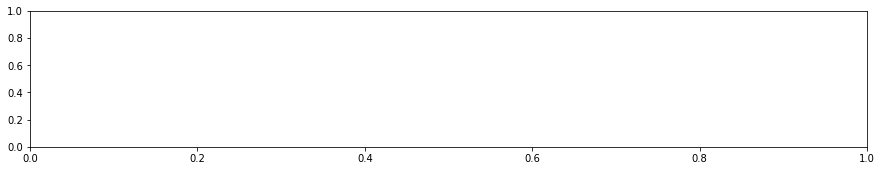

In [20]:
fig, ax = pyplot.subplots(figsize=[15,2.5])
sns.lineplot(data=validate_clean[validate_clean["OK"] == False], x="t", y="expected", hue="sat", style="OK", ax=ax)

<AxesSubplot:>

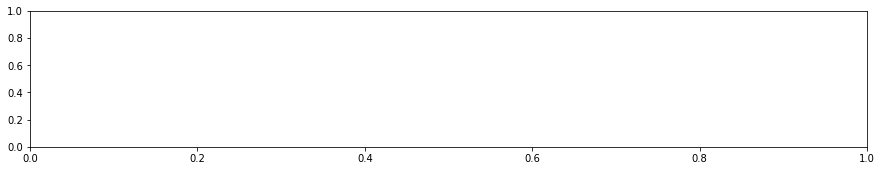

In [21]:
fig, ax = pyplot.subplots(figsize=[15,2.5])
sns.lineplot(data=validate_clean[validate_clean["OK"] == False], x="t", y="actual_med", hue="sat", style="OK", ax=ax)

In [22]:
validate_clean[validate_clean["OK"] == False]

,t,shell,sat,expected_before,expected_after,actual_med,actual_avg,actual_max,actual_min,loss,expected,diff,host,OK
